<h1> <center> NextLabs Jr. Data Scientist Assignment </center></h1>
<h1><center> Evaluation 1 </center></h1>

# Part1

## Ques 
 Write a regex to extract all the numbers with orange color background from the below text in italics.


{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}


## Solution

In [1]:
import re
text = '{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

l = [i for i in re.findall(":(\d*)",text) if i]
print(l)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


# Part 2

### Business Understanding

1. Train a machine learning model (preferably with a neural network) that 
    predicts the customer who is going to be checked in. Once done, please test 
    the prediction with below test data.
2. Do a thorough analysis on the results and the dataset with visualizations (please feel free to add creative ways of visualization here).

3. Host/Deploy the results using any hosting service you want (streamlit/flask)


### Exploratory Data Analysis

### Import Packages and Load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas_profiling as pp


In [3]:
df_train = pd.read_csv("train_data_evaluation_part_2.csv")


In [4]:
df_test = pd.read_csv("test_data_evaluation_part2.csv")

In [5]:
df_train.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape

(82580, 29)

In [7]:
df_train.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [9]:
df_train.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning

In [10]:
#pp.ProfileReport(df_train)

In [11]:
df_train['BookingsNoShowed'].unique()

array([0, 1, 2, 3], dtype=int64)

#### Which type of DistributionChannel has the highest number of cancellations?

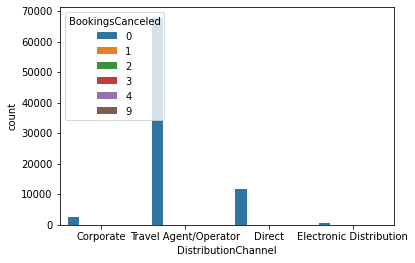

In [12]:
sns.countplot(data=df_train, x = 'DistributionChannel', hue='BookingsCanceled')
plt.show()

In [13]:
df_train.drop('ID',axis=1,inplace=True)

In [14]:
df_train.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_train.isnull().sum()

Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

C:\Users\Hp\anaconda3\envs\customerprediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

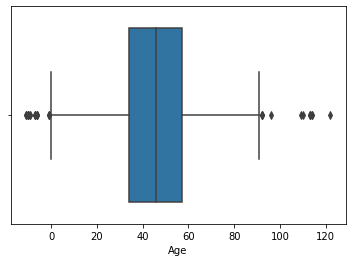

In [16]:
sns.boxplot(df_train['Age'])

In [17]:
df_train['Age'].median()  # 46 aged people are there in this dataset

46.0

In [18]:
df_train.loc[df_train['Age']==46,'Age'].count()

1717

In [19]:
df_train.fillna(df_train['Age'].median(),inplace = True)

In [20]:
df_train.isnull().sum()   #now there is no null data

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

<AxesSubplot:>

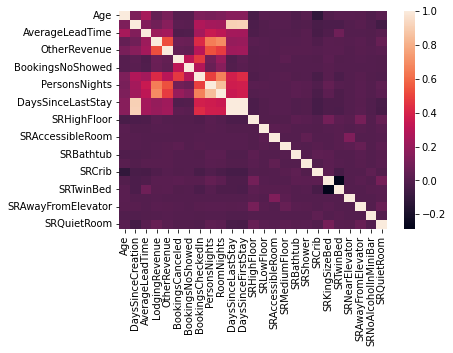

In [21]:
sns.heatmap(df_train.corr())

#bright color represent the high corelation while dark represent the low correlation

<AxesSubplot:xlabel='BookingsCheckedIn', ylabel='Age'>

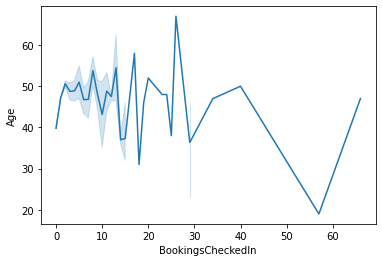

In [22]:
sns.lineplot(x="BookingsCheckedIn",
             y="Age",
             data=df_train)

<AxesSubplot:xlabel='Age', ylabel='BookingsNoShowed'>

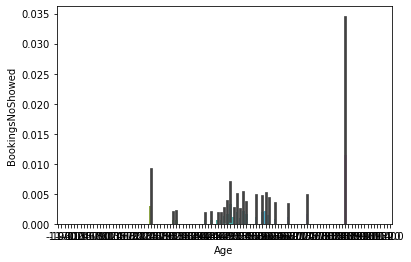

In [23]:
sns.barplot(x ='Age', y ='BookingsNoShowed', data = df_train)

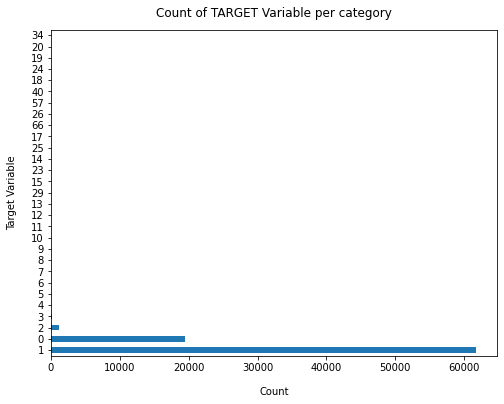

In [24]:
df_train['BookingsCheckedIn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

Nationality
ABW    AxesSubplot(0.125,0.125;0.775x0.755)
AGO    AxesSubplot(0.125,0.125;0.775x0.755)
AIA    AxesSubplot(0.125,0.125;0.775x0.755)
ALB    AxesSubplot(0.125,0.125;0.775x0.755)
AND    AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
WLF    AxesSubplot(0.125,0.125;0.775x0.755)
WSM    AxesSubplot(0.125,0.125;0.775x0.755)
YEM    AxesSubplot(0.125,0.125;0.775x0.755)
ZAF    AxesSubplot(0.125,0.125;0.775x0.755)
ZWE    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, Length: 188, dtype: object

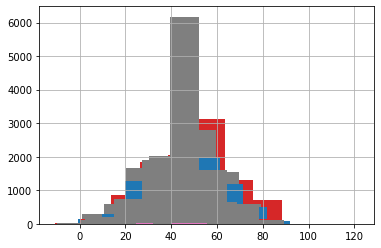

In [25]:
df_train.groupby('Nationality').Age.hist()

Use sns.countplot() to obtain bookings done but no showed up

In [26]:
df_train.corr()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
Age,1.000000,0.122724,0.246355,0.049249,0.112098,0.004373,0.006355,0.126582,0.108378,0.122242,...,0.007016,-0.017120,0.010562,-0.115377,-0.003322,0.013311,0.012962,0.009392,-0.010695,0.013667
DaysSinceCreation,0.122724,1.000000,0.132253,0.085673,0.153800,0.018090,0.012581,0.273504,0.238082,0.228044,...,0.004831,-0.010994,-0.006291,-0.036748,-0.027906,-0.025316,-0.002045,0.010351,-0.011250,-0.055090
AverageLeadTime,0.246355,0.132253,1.000000,0.213989,0.238732,-0.015530,-0.011905,0.238262,0.349180,0.313593,...,-0.000392,-0.006810,0.008143,-0.039513,-0.014470,0.080111,0.000262,-0.000218,-0.006315,0.008595
LodgingRevenue,0.049249,0.085673,0.213989,1.000000,0.525288,0.070747,0.062404,0.420751,0.651218,0.690811,...,0.005712,0.005081,0.011728,-0.015679,0.014073,0.010036,0.004305,0.012000,-0.000964,0.052264
OtherRevenue,0.112098,0.153800,0.238732,0.525288,1.000000,0.043721,0.034086,0.300977,0.529203,0.477174,...,0.007167,0.009703,0.011356,0.002525,0.013125,0.015287,0.001098,0.011606,0.004913,0.016047
BookingsCanceled,0.004373,0.018090,-0.015530,0.070747,0.043721,1.000000,0.314690,0.464598,0.087124,0.198184,...,0.023356,-0.001617,-0.001269,-0.003471,0.017958,-0.007280,-0.000530,0.004246,-0.000335,-0.006286
BookingsNoShowed,0.006355,0.012581,-0.011905,0.062404,0.034086,0.314690,1.000000,0.286262,0.066664,0.149335,...,-0.000642,-0.001146,-0.000899,-0.002460,0.011400,-0.000660,-0.000376,-0.001288,-0.000238,-0.003834
BookingsCheckedIn,0.126582,0.273504,0.238262,0.420751,0.300977,0.464598,0.286262,1.000000,0.486211,0.659022,...,0.010944,-0.004671,-0.000490,-0.035802,0.010867,-0.023750,0.001039,0.009080,-0.004712,-0.010975
PersonsNights,0.108378,0.238082,0.349180,0.651218,0.529203,0.087124,0.066664,0.486211,1.000000,0.847765,...,0.005826,0.017151,0.013756,-0.011227,0.043089,0.005521,0.000809,0.014386,-0.002094,0.031691
RoomNights,0.122242,0.228044,0.313593,0.690811,0.477174,0.198184,0.149335,0.659022,0.847765,1.000000,...,0.006256,0.017075,0.011510,-0.031799,0.025185,-0.022776,0.000843,0.014260,-0.001782,0.019545


Now we will extract the numerical and categorical columns from the dataset for further processes.

In [27]:
#numerical variables

num = list(df_train.select_dtypes(include=['int64','float64']).keys())
print('numerical columns :  ',num)

#categorical variables

cat = list(df_train.select_dtypes(include='O').keys())

print('categorical columns  : ',cat)

numerical columns :   ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']
categorical columns  :  ['Nationality', 'DistributionChannel', 'MarketSegment']


Here we create the num variable for numerical columns and cat for the categorical columns

Now we see the value counts of each category in each categorical column.

In [28]:
x_num = df_train[num]
x_num.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.0,150,45,371.0,105.3,1,0,3,8,5,...,0,0,0,0,0,0,0,0,0,0
1,46.0,1095,61,280.0,53.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1095,93,240.0,60.0,0,0,1,10,5,...,0,0,0,0,0,0,0,0,0,0
4,51.0,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality reduction :

### Handling categorical Variables 
So, here we have to handle categorical columns, handle means we have to convert categorical values into numerical values
because while the training model dataset contains all the numerical values categories won’t accept.

#Categorical features only

In [29]:
# Now I want to run PCA analysis on categorical features to see if we can really reduce our 
# dataset dimensionality. For PCA to run effectively, let's convert categorical features to 
# numerical ones using Scikit-learn. This requires running integer encoding first follwed 
# by OneHotEncoding.

In [30]:
x_cat = df_train[cat]

In [31]:
x_cat.head()

,Nationality,DistributionChannel,MarketSegment
0,PRT,Corporate,Corporate
1,PRT,Travel Agent/Operator,Travel Agent/Operator
2,DEU,Travel Agent/Operator,Travel Agent/Operator
3,FRA,Travel Agent/Operator,Travel Agent/Operator
4,FRA,Travel Agent/Operator,Travel Agent/Operator


In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def labelencode(df_train):
    le = LabelEncoder()
    return df_train.apply(le.fit_transform)

def onehotencode(df_train):
    onehot = OneHotEncoder()
    return onehot.fit_transform(df_train).toarray()

X_2 = labelencode(x_cat)
onehotlabels = onehotencode(X_2)

In [33]:
# Let's take a look at X_2 to see how the labels have been converted to numerical digits instead.

X_2.head().transpose()

,0,1,2,3,4
Nationality,137,137,43,57,57
DistributionChannel,0,3,3,3,3
MarketSegment,2,6,6,6,6


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Perform PCA on the one-hot encoded labels
X_pca = pca.fit_transform(onehotlabels)

In [35]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.54719229 0.27712559 0.17568212]


This means that the principal component 1 holds 54.7% of the information while the principal component 2 holds only 27.7% of the information. Summing them up, we will have ~82% of information.

In [36]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
df_num_standard = StandardScaler().fit_transform(x_num.values)

#replacing the X_num dataframe with the standardized dataframe
x_num[:] = df_num_standard

C:\Users\Hp\AppData\Local\Temp\ipykernel_19620\615671201.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_num[:] = df_num_standard


### Independent and Dependent Variables

This is an important step into the model-building part we have to separate all the columns which are important or by which target values are predicted with the target values which e have to predict.

Now we start our model training process, first, we have to divide our dataset into dependent and independent variables.

In [37]:
X_arr=np.concatenate((onehotlabels, df_num_standard), axis=1)
y_arr = df_train['BookingsCheckedIn'].values

### Splitting data
This is the important part is we have to split our data into training and testing parts by which we do further processes.

Now we have to split our dataset into train and test sets, where the training set is used to train the model, and the 
testing set is used for testing the values of targeted columns.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr,y_arr,test_size=0.25,random_state=2019)
print(X_train.shape)
print(X_test.shape)

(61935, 224)
(20645, 224)


### Building Neural Network 
Now all our preprocessing and splitting part is done, its time for building the neural network, we will use TensorFlow and Keras library for building the artificial neural net.

Firstly we have to import these important libraries for further processes.

### now we create our artificial neural network.

In [39]:
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras

In [40]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(27, input_shape=(224,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [57]:
#trying
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(27, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)


### Compile the Model
The compilation of the model is the final step of creating an artificial neural model. The compile defines the loss function, the optimizer, and the metrics which we have to give into parameters.

Here we use compile method for compiling the model, we set some parameters into the compile method.


In [58]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1936/1936 [==============================] - 5s 2ms/step - loss: -86.9380 - accuracy: 0.9636
Epoch 2/10
1936/1936 [==============================] - 4s 2ms/step - loss: -645.1582 - accuracy: 0.9811
Epoch 3/10
1936/1936 [==============================] - 4s 2ms/step - loss: -1978.3650 - accuracy: 0.9814
Epoch 4/10
1936/1936 [==============================] - 4s 2ms/step - loss: -5470.3560 - accuracy: 0.9813
Epoch 5/10
1936/1936 [==============================] - 4s 2ms/step - loss: -10953.6621 - accuracy: 0.9813
Epoch 6/10
1936/1936 [==============================] - 4s 2ms/step - loss: -19532.6504 - accuracy: 0.9814
Epoch 7/10
1936/1936 [==============================] - 4s 2ms/step - loss: -37336.8164 - accuracy: 0.9812
Epoch 8/10
1936/1936 [==============================] - 4s 2ms/step - loss: -57691.2539 - accuracy: 0.9813
Epoch 9/10
1936/1936 [==============================] - 4s 2ms/step - loss: -84053.9141 - accuracy: 0.9813
Epoch 10/10
1936/1936 [=====================

In [59]:
#Let's plot our model history (accuracy and loss) to see how our epochs worked.
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

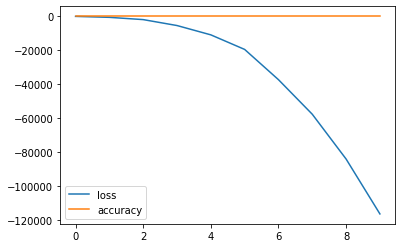

In [60]:
model_loss.plot()

### Make predictions & Model evaluation

In [61]:
model.evaluate(X_test,y_test)

646/646 [==============================] - 1s 2ms/step - loss: -95166.8750 - accuracy: 0.9809


[-95166.875, 0.9808670282363892]

In [62]:
# predict the values
ypred = model.predict(X_test)
#print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

646/646 [==============================] - 1s 2ms/step
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
#make dataframe for comparing the orignal and predict values
data = {'orignal':y_test, 'predicted':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


In [64]:
df_check.tail(10)

,orignal,predicted
20635,1,1
20636,0,0
20637,1,1
20638,1,1
20639,0,0
20640,0,0
20641,1,1
20642,1,1
20643,1,1
20644,1,1


In [65]:
df_train['BookingsCheckedIn'].head()

0    3
1    1
2    0
3    1
4    0
Name: BookingsCheckedIn, dtype: int64

In [66]:
df_train.shape

(82580, 28)

In [68]:
# Save the model
model.save('./model.h5')

In [69]:
from keras.models import load_model
model = load_model('./model.h5')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 27)                6075      
                                                                 
 dense_5 (Dense)             (None, 15)                420       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,666
Trainable params: 6,666
Non-trainable params: 0
_________________________________________________________________
